# Plotting of `History` Objects
In Paretobench, `History` objects contain multiple populations in an ordered list of "reports" which represent the progress of an optimization on solving a problem. This notebook demonstrates some options for plotting this data.

In [1]:
import paretobench as pb
from paretobench.plotting import (
    history_obj_scatter,
    history_dvar_pairs,
    history_dvar_animation,
    history_obj_animation,
)
import matplotlib.pyplot as plt

In [2]:
# Load some data to plot
exp = pb.Experiment.load("data/for_plotting.h5")

## Plotting the Objectives
First, we demonstrate functions to look at the objectives. These work in 2D and 3D.

Text(0.5, 1.0, 'Show the Dominated Area (select first few generations)')

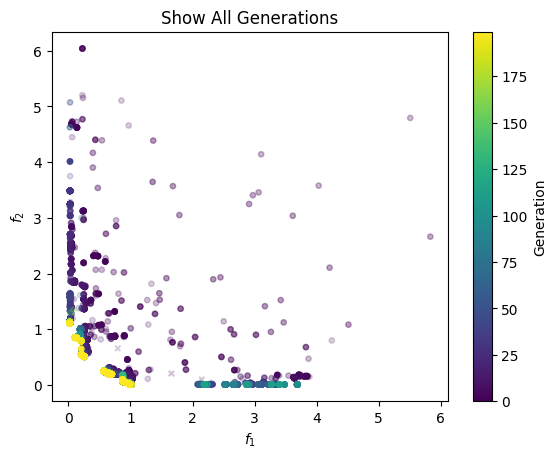

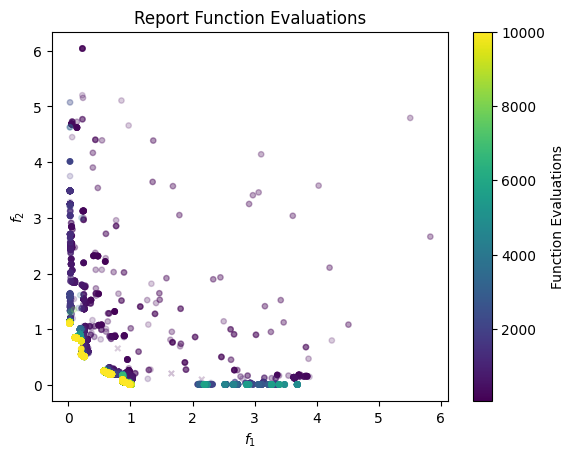

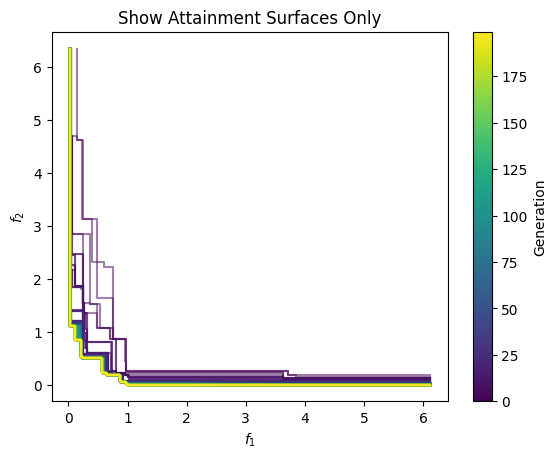

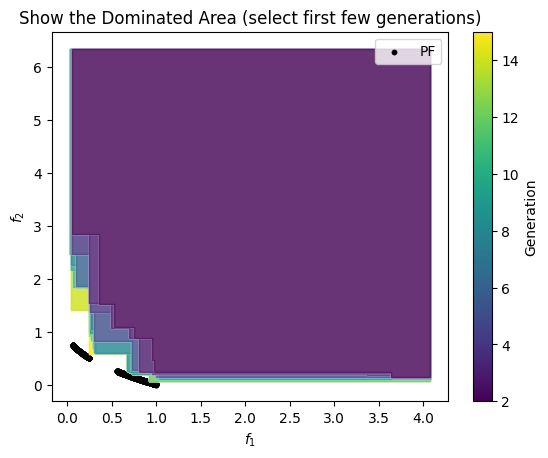

In [3]:
history_obj_scatter(exp.runs[0], show_attainment=False, generation_mode="cmap")
plt.title("Show All Generations")

history_obj_scatter(exp.runs[0], show_attainment=False, generation_mode="cmap", label_mode="fevals")
plt.title("Report Function Evaluations")

history_obj_scatter(exp.runs[0], show_attainment=True, generation_mode="cmap", show_points=False)
plt.title("Show Attainment Surfaces Only")

history_obj_scatter(
    exp.runs[0], reports=(2, 16), show_dominated_area=True, show_points=False, show_pf=True, legend_loc="upper right"
)
plt.title("Show the Dominated Area (select first few generations)")

## Plotting the Decision Variables
This section shows how the decision variables can be shown for the contained populations.

(<Figure size 1000x1000 with 26 Axes>,
 array([[<Axes: ylabel='x1'>, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
        [<Axes: ylabel='x2'>, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
        [<Axes: ylabel='x3'>, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
        [<Axes: ylabel='x4'>, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
        [<Axes: xlabel='x1', ylabel='x5'>, <Axes: xlabel='x2'>,
         <Axes: xlabel='x3'>, <Axes: xlabel='x4'>, <Axes: xlabel='x5'>]],
       dtype=object))

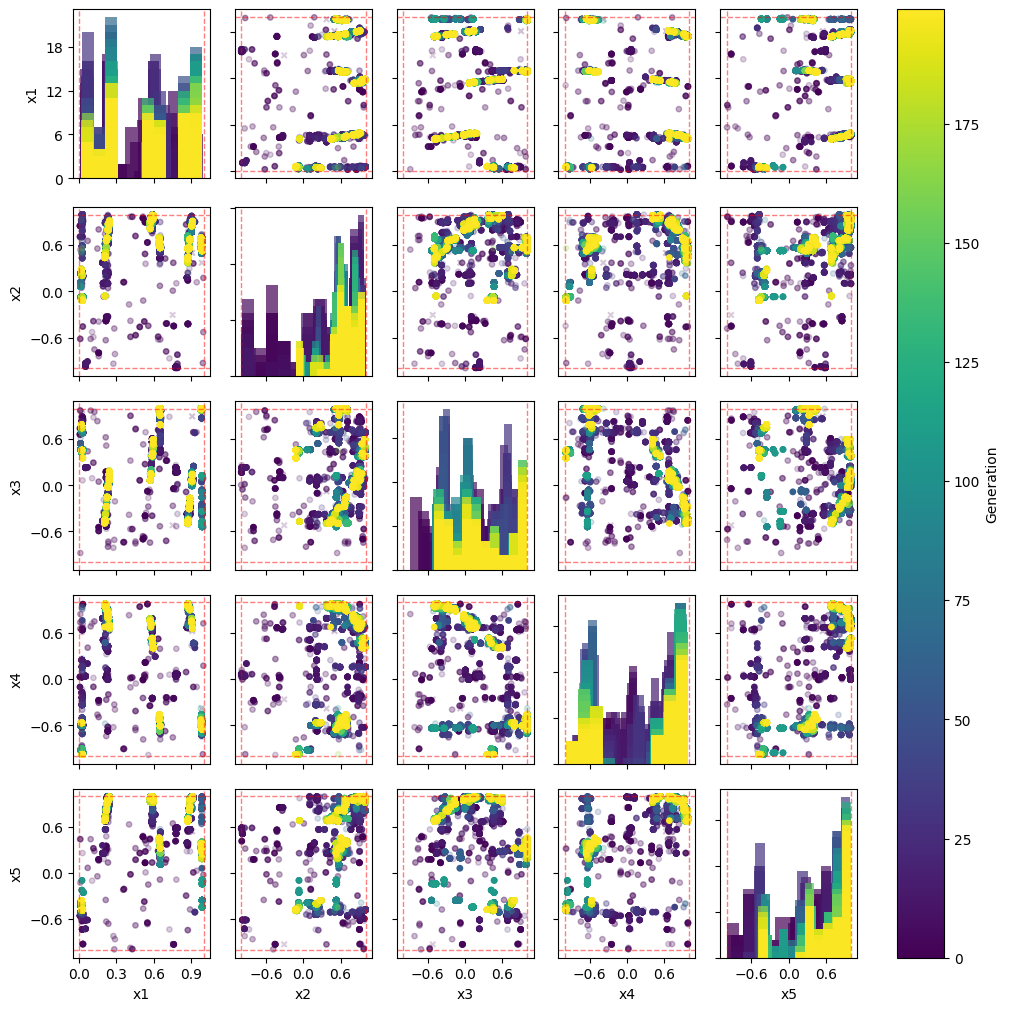

In [4]:
history_dvar_pairs(exp.runs[0], plot_bounds=True)

(<Figure size 600x600 with 10 Axes>,
 array([[<Axes: ylabel='x1'>, <Axes: >, <Axes: >],
        [<Axes: ylabel='x2'>, <Axes: >, <Axes: >],
        [<Axes: xlabel='x1', ylabel='x3'>, <Axes: xlabel='x2'>,
         <Axes: xlabel='x3'>]], dtype=object))

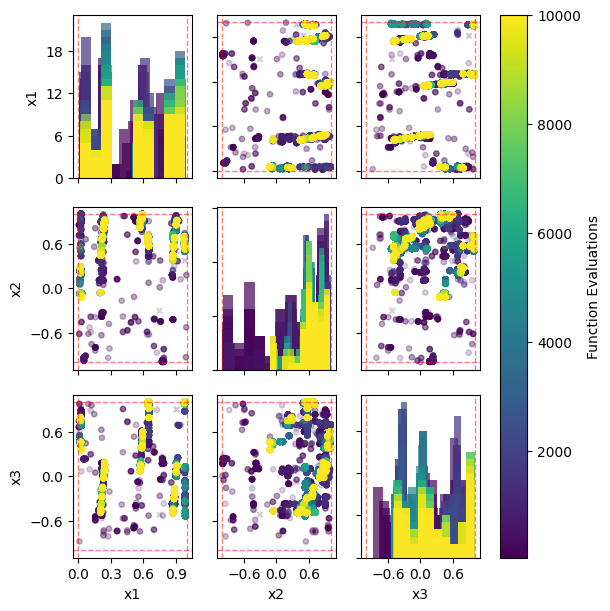

In [5]:
# Show plotting the first few decision vars and label by function evaluation
history_dvar_pairs(exp.runs[0], dvars=(0, 3), plot_bounds=True, label_mode="fevals")

## Creating Animations from `History` Objects
ParetoBench also includes a few methods for the creation of animations of the progress of optimization. These can be created for both the objectives and decision variables. We save them to disk at the end and do not include the animations saved in this notebook due to space constraints.

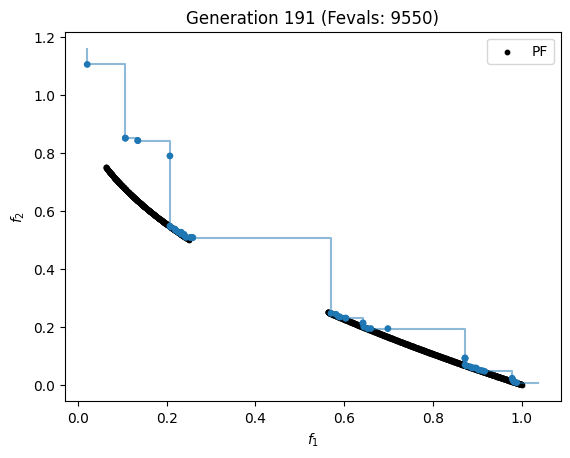

In [6]:
# Create an animation of the objective functions as the optimization progresses
history_obj_animation(
    exp.runs[0], show_attainment=True, show_pf=True, dynamic_scaling=True, reports=slice(0, -1, 10)
).save("objectives.mp4")

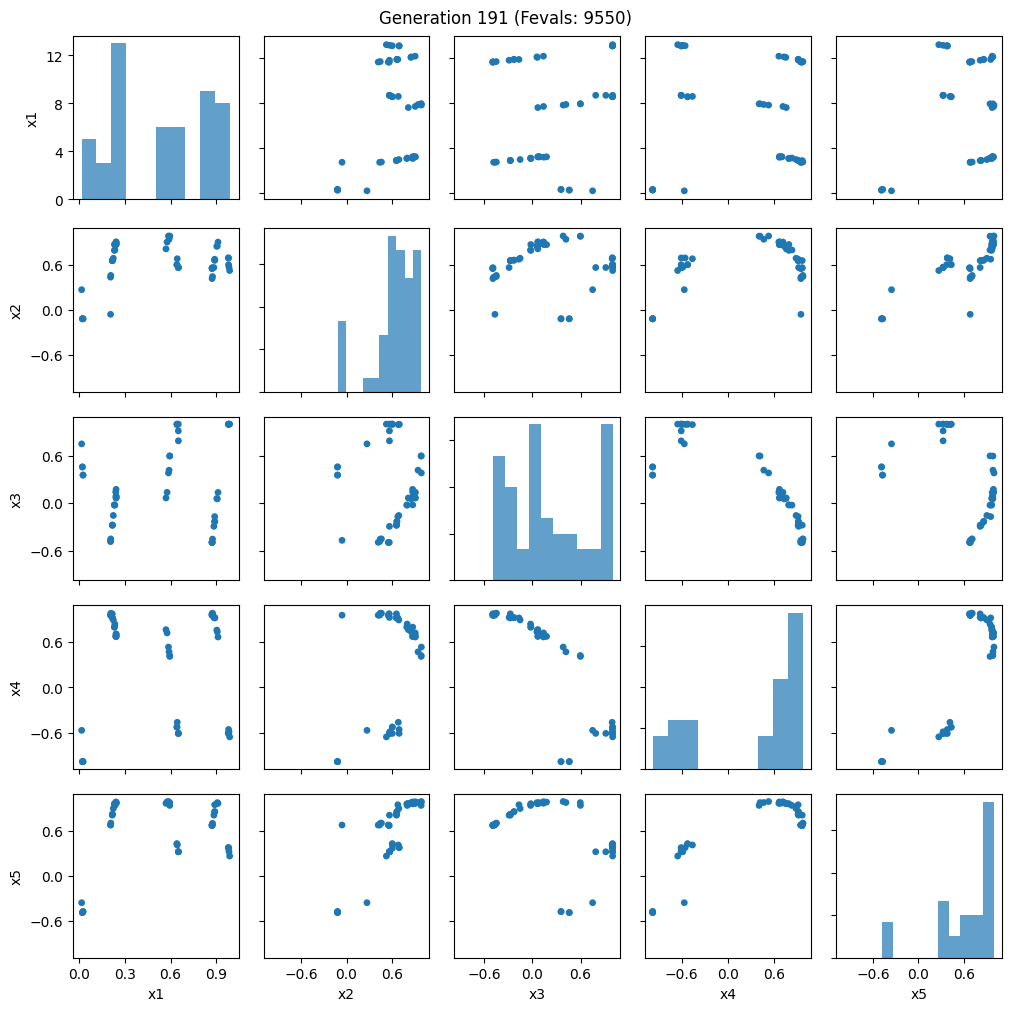

In [7]:
# Make pair plots of the decision variables as the optimization algorithm proceeds
history_dvar_animation(exp.runs[0], reports=slice(0, -1, 10)).save("decision_vars.mp4")